# Primera ejercitación de Laboratorio de Datos (1er cuatrimestre 2022)

***Fecha de entrega de consigna: 6/4/2022***

***Fecha de entrega de resolución: 21/4/2022 a las 23:55 PM***

***Que hay que hacer***: Más abajo hay una serie de consignas para hacer. La idea es que hagan lo que se pide y discutan el sentido de los resultados. **¿Por qué se ve lo que se ve? ¿Tiene sentido? ¿Qué podría implicar? ¿Qué más se podría hacer para responder estas preguntas?** (sin hacer falta que lo hagan).

***Cómo hay que hacerlo***: Cada alumno/a tiene que crear y compartir un notebook individual con la resolución, el cual se llame "Ejercitacion 1" seguido de su nombre y apellido. Es individual. En el campus virtual compartimos instrucciones para la entrega de ejercicios. El notebook tiene que contener código que al ejecutarse haga lo que pedimos, y texto comentando lo que ustedes consideren necesario para que nosotros entendamos lo que hicieron.

***Qué pasa después***: Nosotros evaluamos los notebooks de cada uno, les decimos cómo les fue, y lo tenemos en cuenta para calcular la nota final. El día siguiente a la fecha límite de entrega, publicamos un notebook junto con nuestra resolución de la ejecitación para que puedan comparar con lo que ustedes hicieron.

***Qué hago si no me sale***: Consultarnos las dudas que tengan en el foro de la materia que se encuentra en el campus virtual o en la clases presenciales o de consulta.

***RECUERDEN QUE ES OBLIGATORIO ENTREGAR ALGO***


# Los datos: partidos y jugadores de todos los mundiales hasta Brasil 2014

Estamos en un año de mundial, y si bien podríamos ignorarlo completamente, decidimos no hacerlo. El resultado es la siguiente ejercitación.

Compartimos dos archivos .csv: *WorldCupMatches.csv* y *WorldCupPlayers.csv* (https://drive.google.com/drive/folders/14qGoWAdkwQRS2m55dszWzF3f0eviAS1k?usp=sharing)

El primero de los dos archivos (*WorldCupMatches.csv*) contiene información sobre partidos individuales de cada mundial desde 1930 hasta 2014, con los siguientes campos (en el mismo orden que en el archivo):


*   Año del mundial
*   Fecha y hora del partido
*   Etapa (e.g. grupos, semis, final, etc)
*   Nombre del estadio
*   Ciudad del estadio
*   Fecha y hora del partido
*   Etapa (e.g. grupos, semis, final, etc)
*   Nombre del estadio
*   Ciudad del estadio
*   Equipo local
*   Goles del equipo local
*   Equipo visitante
*   Goles del equipo visitante
*   Cantidad de expectadores en el público
*   Condición de la victoria (e.g. si fue por penales)
*   Goles anotados hasta el primer tiempo por el local
*   Goles anotados hasta el primer tiempo por el visitante
*   Nombre y país del árbitro y los asistentes
*   Un ID único por ronda de mundial y por partido
*   Código de los dos equipos que jugaron el partido

El otro archivo (*WorldCupPlayers.csv*) contiene los jugadores de todos los partidos de todos los mundiales, con los siguientes campos:

*   ID único por ronda de mundial y por partido
*   Iniciales del equipo 
*   Nombre del director técnico
*   Titularidad (S) o suplente (N)
*   Número de camiseta
*   Nombre del jugador
*   Si es arquero (GK) o capitán (C)
*   Eventos asociados al jugador. Solo nos interesan los de la forma *GX'*, que significa que el jugador metió un gol en el minuto X. Hay un evento por gol que haya hecho el jugador en ese partido.

# Primera consigna

1. Construir un ranking de los mundiales por cantidad de goles anotados en promedio por partido (por ejemplo, en una lista).

2. Hacer un gráfico de barras donde en el eje Y figura la cantidad promedio de goles y en el X aparecen los mundiales, ordenados de izquierda a derecha en cantidad decreciente de goles:

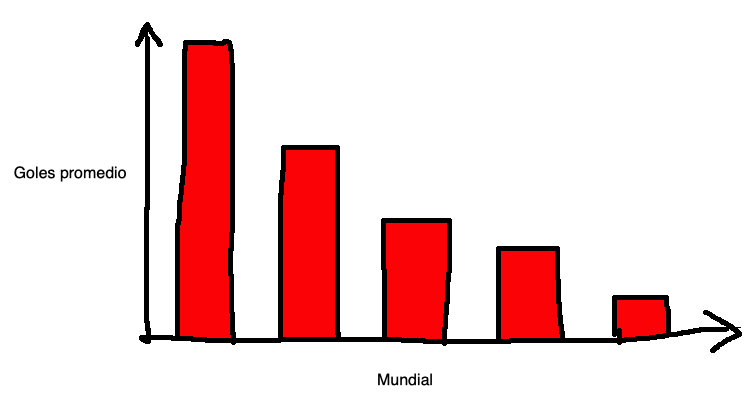

# Segunda consigna

2. Construir un ranking de los países que más partidos ganaron por penales. Representarlo en un gráfico igual que en la consigna anterior.

3. ¿Quién fue el arquero que más partidos ganó por penales?

# Tercera consigna

4. Construir un histograma que muestra como están distribuidos los goles a lo largo de la duración de un partido. Es decir, armar un gráfico que divida los '90 minutos de un partido en bines de 4 minutos en el eje X, y que tenga en el eje Y la cantidad total de goles anotados en el bin correspondiente. 

5. Hacerlo por separado para la fase de grupos y para la fase de eliminación (todos los partidos posteriores a la fase de grupos).

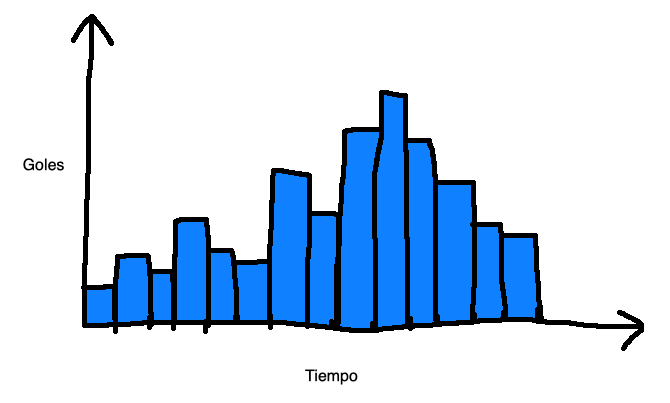

# Cuarta consigna

6. Para los partidos en los que hubo al menos algún gol, obtener el tiempo que transcurrió hasta el primer gol. h
Hacer un histograma de la distribución de estos valores.

7. Para los partidos en los que hubo más de un gol, obtener los tiempos transcurridos entre goles. Hacer un histograma de la distribución de estos valores.

8. ¿Se parecen estas distribuciones a algunas de las que vimos en clase?


PS: Las ilustraciones con Paint son deliberadas (si un ejemplo no se puede ilustrar fácil con Paint, no se puede ilustrar fácil) - Enzo




# Resolución

In [172]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [20]:
matches = pd.read_csv('PrimeraEjercitacion/WorldCupMatches.csv')
players = pd.read_csv('PrimeraEjercitacion/WorldCupPlayers.csv')

matches = matches.assign(Total_goals = lambda df: df['Home Team Goals'] + df['Away Team Goals'])

matches.drop_duplicates(inplace = True)
players.drop_duplicates(inplace = True)


In [ ]:
df = matches.merge(players, on = 'MatchID')
df['Event_mod'] = df['Event'].str.split(' ',expand = False)

# Primera Consigna

## 1) Construir un ranking de los mundiales por cantidad de goles anotados en promedio por partido (por ejemplo, en una lista).
Se realizó el ranking y se ordeno el data frame y el resultado final se expone en una lista. En este se puede evidenciar que el mundial con más goles es el de 1954

In [252]:
world_cup_goals = matches.groupby('Year', as_index = False).mean().sort_values(by = ['Total_goals'], ascending  = False).reset_index()

world_cup_goals['Year'] = world_cup_goals['Year'].astype('category')

list_world_cup_goals = world_cup_goals.Year.to_list()
print(list_world_cup_goals)

[1954.0, 1938.0, 1934.0, 1950.0, 1930.0, 1958.0, 1970.0, 1982.0, 1962.0, 1966.0, 1994.0, 1978.0, 1998.0, 2014.0, 1974.0, 1986.0, 2002.0, 2006.0, 2010.0, 1990.0]


## 2) Hacer un gráfico de barras donde en el eje Y figura la cantidad promedio de goles y en el X aparecen los mundiales, ordenados de izquierda a derecha en cantidad decreciente de goles:
Se graficó el ranking en un grafico de barras ordenado de forma decreciente. 

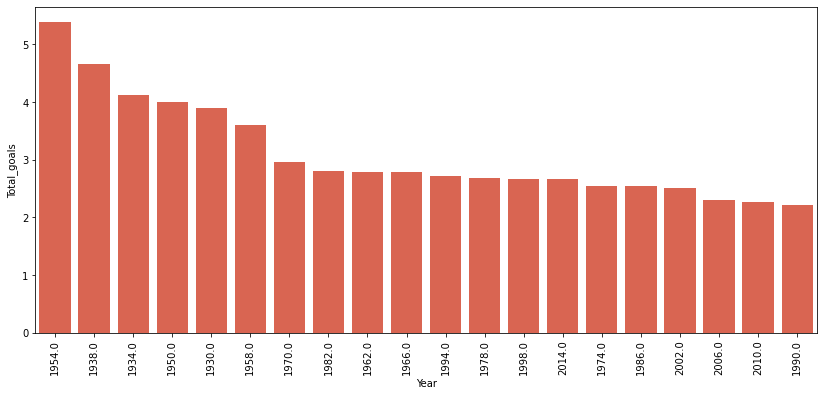

In [191]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x = 'Year', y = 'Total_goals', data = world_cup_goals, order = world_cup_goals['Year'], color='#EF553B', )
ax.tick_params(axis='x', rotation=90)

plt.show()

Originalmente lo había intentado plotear usando Plotly como todo el resto de los plots del TP pero por algún motivo la librería no permite ordenar los años de forma no cronlógica o no encontre como hacerlo. Se los dejo por si alguno sabe como resolverlo me divertiría saber.

In [186]:
fig = px.bar(world_cup_goals, x = 'Year', y = 'Total_goals', color_discrete_sequence=['#EF553B',])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    xaxis = dict(title = 'World Cup',
                #  tickmode = 'array',
                #  tickformat = '', 
                 categoryorder ='array',
                 categoryarray = world_cup_goals['Year'].tolist()
                ),
    yaxis = dict(title ='Average goals per match',),
    
    template = 'plotly_white'
)
fig.show()


# Segunda Consigna

## 3) Construir un ranking de los países que más partidos ganaron por penales. Representarlo en un gráfico igual que en la consigna anterior.
Armé el dataframe de forma rankeada para los países que más partidos ganaron por penales. Esto mismo fue graficado en un gráfico de barras. El país con más partidos ganados por penales en la historia es *Argentina*

Observaciones: En el gráfico aparecen 2 Alemanias, podrían haberse unido en 1 solo país. Me quedó la duda de que sería lo más correcto.

In [45]:
ties = matches.dropna(subset=['Win conditions'])
penalties = ties[ties['Win conditions'].str.contains('penalties')]
penalties = penalties.assign(Penalties = lambda df: df['Win conditions'].str.extract(r'\(([^()]+)\)'),
                            Win_team = lambda df: np.where(df.Penalties.str[0] > df.Penalties.str[-1], df['Home Team Name'], df['Away Team Name']),
                            Win_team_initials = lambda df: np.where(df.Penalties.str[0] > df.Penalties.str[-1], df['Home Team Initials'], df['Away Team Initials'])
                            )


In [254]:
ranking_penalties = penalties.groupby('Win_team', as_index = False).agg('count').sort_values(by=['Penalties'], ascending = False)

# sns.barplot(x = 'Win_team', y = 'Penalties', data = ranking_penalties)
# plt.show()

fig = px.bar(ranking_penalties, x = 'Win_team', y = 'Penalties' )

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    xaxis = dict(title = 'Winning national team'),
    yaxis = dict(title ='Matches won'),
    template = 'plotly_white'
)
fig.show()


## 4) ¿Quién fue el arquero que más partidos ganó por penales?
En base al DF utilizado para el punto anterior se obtuvieron los arqueros que atajaron en las definiciones por penales correspondientes. Se utilizaron los arqueros que estaban en el arco en la definicion por penales que se gano el partido, para lo que se tuvieron en cuenta los cambios.
Goycochea, Taffarel y Schumacher fueron los arqueros que más partidos ganaron en instancia de penales con 2 cada uno.

In [109]:
goalkeepers = (players.query("(Position == 'GK') | (Position == 'GKC' )")
    .assign(
        gk_at_penalty = lambda df: np.where(((df['Line-up'] == 'S') & (~(df['Event'].str.contains('O', na=False))) ) | 
                                            ((df['Line-up'] == 'N' )& (df['Event'].str.contains('I'))), True, False) )
    .query("`gk_at_penalty` == True")
    # .query("`Line-up` == 'S'")
)
penalties_gk = penalties.merge(goalkeepers, on = "MatchID").query("Win_team_initials == `Team Initials`")

In [184]:
ranking_gk = penalties_gk.groupby('Player Name', as_index = False).agg('count').sort_values(by=['gk_at_penalty'], ascending = False)

# sns.barplot(x = 'Win_team', y = 'Penalties', data = ranking_penalties)
# plt.show()

fig = px.bar(ranking_gk, x = 'Player Name', y = 'gk_at_penalty' )

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    xaxis = dict(title = 'Goalkeepers'),
    yaxis = dict(title ='Matches won'),
    template = 'plotly_white'
)
fig.show()


# Tercera Consigna

## 5) Construir un histograma que muestra como están distribuidos los goles a lo largo de la duración de un partido. Es decir, armar un gráfico que divida los '90 minutos de un partido en bines de 4 minutos en el eje X, y que tenga en el eje Y la cantidad total de goles anotados en el bin correspondiente. 

Se armo el histograma para cada minuto en el que se realizó un gol durante un partido reglamenntarios de un mundial exclusivamente durante los 90 minutos agrupados en bines de 4minutos.

In [260]:
goals = df.explode('Event_mod')
goals = goals[df['Event_mod'].str.contains('G|W|P', na =False)]
goals = goals.assign(min_goal = lambda df: df.Event_mod.str.extract('(\d+)')).sort_values(['MatchID', 'min_goal'], ascending = True)
goals['min_goal'] = goals['min_goal'].astype(int)
goals90 = goals.query("min_goal < 90").assign(
    Stage_mod = lambda df: np.where(df["Stage"].str.contains('Group',na=False), 'Group', 'Playoff')
)


In [261]:
fig = px.histogram(goals90, x="min_goal",nbins = 22,color_discrete_sequence=['#00CC96'])
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    bargap=0.1,
    xaxis = dict(title = 'Minute of goal'),
    yaxis = dict(title ='Number of goals'),
    template = 'plotly_white')
fig.show()

## 6) Hacerlo por separado para la fase de grupos y para la fase de eliminación (todos los partidos posteriores a la fase de grupos).
Se subidividio el histograma del punto previo en goles ocurridos durante fases de grupos y fases de eliminatorias. En el grafico arriba está eliminatorias (playoff) y abajo los de fase de grupos (group)

In [214]:
fig = px.histogram(goals90, x="min_goal",nbins = 22,color_discrete_sequence=['#00CC96'], facet_row = 'Stage_mod')

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    bargap=0.1,
    # xaxis = dict(title = 'Minute of goal'),
    # yaxis = dict(title ='Number of goals'),
    template = 'plotly_white')

fig.for_each_yaxis(lambda yaxis: yaxis.update(title='Number of goals'))
fig.for_each_xaxis(lambda yaxis: yaxis.update(title='Minute of goal'))

fig.show()

# Cuarta Consigna

## 7) Para los partidos en los que hubo al menos algún gol, obtener el tiempo que transcurrió hasta el primer gol. Hacer un histograma de la distribución de estos valores.
Histograma de tiempo de partido transcurrido hasta el primer gol.

In [227]:
first_goal = goals.groupby('MatchID').min_goal.min()

In [245]:
fig = px.histogram(first_goal, x="min_goal",nbins = 30,color_discrete_sequence=['#AB63FA'])
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    bargap=0.1,
    xaxis = dict(title = 'Time elapsed until first goal'),
    yaxis = dict(title ='Number of goals'),
    template = 'plotly_white')
fig.show()

## 8) Para los partidos en los que hubo más de un gol, obtener los tiempos transcurridos entre goles. Hacer un histograma de la distribución de estos valores.
Histograma de tiempo de partido transcurrido entre cada gol del partido

In [241]:
diff_goal = goals.sort_values(['MatchID','min_goal']).assign(diff_goal = lambda df: df.groupby('MatchID').min_goal.diff()).diff_goal.dropna()


In [253]:
fig = px.histogram(diff_goal, x="diff_goal",nbins = 120,color_discrete_sequence=['#AB63FA'])
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    bargap=0.1,
    xaxis = dict(title = 'Difference of minutes between goals'),
    yaxis = dict(title ='Number of goals'),
    template = 'plotly_white')
fig.show()

## 9) ¿Se parecen estas distribuciones a algunas de las que vimos en clase?
La distribución del punto previo dentro de las distribuciones vistas se parece a una exponencial. Pero consideraría que podría ser tambien una distribución de tipo Poisson.